### Huber loss
We will now learn about the Huber loss which is a way to combine the RSS and MAE cost functions. At the end of this unit, you should be able to fit models with this objective function using objects from the Scikit-learn library. Huber loss is a cost function which is robust to outliers and smooth. In fact, its formula uses both the absolute value and the square function.

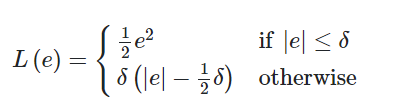

In [1]:
from IPython.display import Image
Image(filename="huber.png")

In our case, the variable e refers to the residual e=(y-y_hat) and L(e) is the loss value of a single data point. The formula defines two cases using a threshold δ. When the magnitude of the residual is below 
δ (small error), the function increases quadratically like the RSS one and then, for larger errors, linearly like the MAE one.

#### Implementation with SGDRegressor
In practice, it’s a good idea to try to use the Huber loss if there are outliers in the data. Let’s test it on our modified marketing campaign dataset


In [2]:
import pandas as pd
from sklearn.preprocessing import scale

# Load data
data_df = pd.read_csv("c3_marketing-outliers.csv")
x = scale(data_df.tv.values)  # SGDRegressor requires data to be rescaled
y = data_df.sales.values

The Numpy polyfit() function doesn’t implement Huber loss. Hence, we will now switch to the Scikit-learn library which provides many machine learning models. The workflow is a bit different with this library. Instead of calling functions directly, we create objects that we fit to datasets.

Let’s start with the SGDRegressor object. First, we need to import it from the linear_model module from Scikit-learn.

The SGDRegressor object implements the stochastic gradient descent (SGD) algorithm which is a very generic algorithm that can minimize a great variety of cost functions. For this reason, the object has many parameters.

By default, it minimizes the square of the residuals plus a penalization term. As for now, let’s remove the penalization term by setting penalty='none'. We can then change the loss function to Huber with loss='huber' and set the threshold value δ with the epsilon parameter.

In [3]:
from sklearn.linear_model import SGDRegressor
# Create a linear regression with Huber loss
lr_huber = SGDRegressor(
    loss="huber", penalty="none", epsilon=1, max_iter=1000, tol=1e-3
)

* The penalization term is useful to fight overfitting. In the machine learning vocabulary, it is called a hyperparameter. We will learn more about it later in this course.

SGD is an iterative algorithm that tries to minimize the objective function by taking small steps in the direction of the optimal solution. For this reason, we need to specify when it stops. With the code from above, SGD stops when the loss stops improving (tol parameter) or when it reaches some maximum number of iterations (max_iter one). Regarding the values, we simply use the defaults, recommended ones from Scikit-learn.

We can now fit the model to the data with its fit() function.

In [4]:
import numpy as np

# Fit the model
lr_huber.fit(x[:, np.newaxis], y)

SGDRegressor(epsilon=1, loss='huber', penalty='none')

In machine learning, datasets usually have several features. For this reason, Scikit-learn objects expect to get a 2-dimensional array of features. In our case, the x variable is a vector with shape (55,), but we can convert it to a matrix of shape (55,1) by adding a new axis with the [:, np.newaxis] syntax.

When Scikit-learn fits the model, it stores the optimal parameters in a coef_ and an intercept_ attribute.

In [5]:
# Print the slope of the line
print("Slope:", lr_huber.coef_)
# Print the intercept parameter
print("Intercept term:", lr_huber.intercept_)

Slope: [1.12874452]
Intercept term: [3.7904236]


If you run the fit() instruction from above several times and print the parameters, you should see that they vary slightly between each run. This is due to the stochastic nature of the SGD algorithm. We will learn more about the gradient descent algorithm later in this course, but in short, its stochastic version (SGD) optimizes the loss function by picking a random data point at each iteration. For this reason, we say that the algorithm is stochastic because the results depend on these random choices.

We can now visualize our linear regression by generating a hundred data points between min(x) and max(x) with the Numpy linspace() function. We could use the Numpy polyval() function to compute predictions, but Scikit-learn objects also have a predict() function that uses the values in the coef_ and the intercept_ attributes.



In [6]:
# Compute prediction line
x_values = np.linspace(min(x), max(x), num=100)  # Shape (100,)
y_values_huber = lr_huber.predict(x_values[:, np.newaxis])  # Shape (100,1)

Again, we need to add a dimension to the x_values vector since Scikit-learn works with 2-dimensional arrays of features. Let’s plot the prediction line



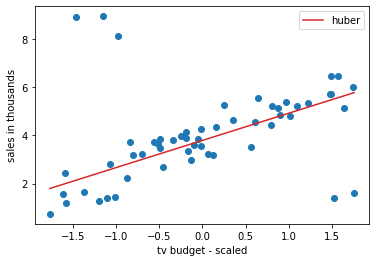

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot predictions
plt.scatter(x, y)
plt.plot(x_values, y_values_huber, c="C3", label="huber")
plt.xlabel("tv budget - scaled")
plt.ylabel("sales in thousands")
plt.legend()
plt.show()

Now, let’s compare this line to the one that we get when minimizing the squares of the residuals, e.g., as with the polyfit() function. To achieve this, we can simply change the loss parameter to squared_error

In [8]:
# Create a linear regression with RSS loss
lr_squared = SGDRegressor(loss="squared_error", penalty="none", max_iter=1000, tol=1e-3)

Again, we can visualize the line by computing predictions for the hundred points in the x_values array from above



In [9]:
# Fit the model
lr_squared.fit(x[:, np.newaxis], y)

# Compute prediction line
y_values_squared = lr_squared.predict(x_values[:, np.newaxis])

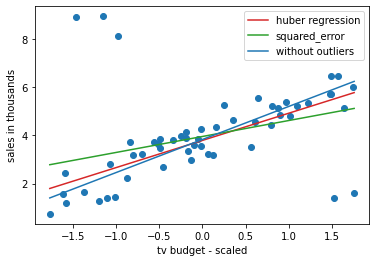

In [10]:
# The final comparison looks like:
# Linear regression without outliers
coefs = np.polyfit(x[:-5], y[:-5], deg=1)  # Filter outliers (the last five values)
y_values_optimal = np.polyval(coefs, x_values)

# Compare models
plt.scatter(x, y)
plt.plot(x_values, y_values_huber, c="C3", label="huber regression")
plt.plot(x_values, y_values_squared, c="C2", label="squared_error")
plt.plot(x_values, y_values_optimal, c="C0", label="without outliers")
plt.xlabel("tv budget - scaled")
plt.ylabel("sales in thousands")
plt.legend()
plt.show()

We can see that the model obtained by minimizing the Huber loss is very close to the one that we get with the polyfit() function after removing the five outliers.

#### HuberRegressor
Note that the SGDRegressor object is very generic and can fit more cost functions than the Huber and RSS ones. However, Scikit-learn also provides the HuberRegressor object which is dedicated to this loss function.

It works similarly to SGDRegressor. You can fit it to data using the fit() function and compute predictions with the predict() one

In [11]:
from sklearn.linear_model import HuberRegressor

# Create a linear regression with Huber loss
lr_huber = HuberRegressor(epsilon=1.35)

# Fit the model
lr_huber.fit(x[:, np.newaxis], y)

HuberRegressor()

Note that there are a few notable differences with the SGDRegressor(loss='huber') object

* The threshold δ depends on the scale of the residuals. The HuberRegressor implements a mechanism to make it scale invariant. The default value of epsilon=1.35 should work well in most cases.
* They use a different optimization algorithm. The SGDRegressor object uses stochastic gradient descent (SGD) while the HuberRegressor object uses the BFGS one. In short, BFGS should be more efficient when there is a small number of samples and converge in fewer iterations to the optimal solution. The default value for the number of iterations max_iter=100 should be fine in most cases.

#### Summary
Let’s summarize what we’ve learned in this unit. Here are a few takeaways

Ideally, we want to use cost functions that are robust to outliers and easy to optimize
* The RSS one is smooth but sensitive to outliers
* The MAE one is robust but difficult to optimize
* The Huber loss combines both advantages of the RSS and MAE cost functions but adds a new parameter: the threshold δ
In practice, if you believe that there are outliers in the data, then it’s a good idea to spend some time removing them using the techniques from the previous lessons. Then, it’s easy to test several models and pick the best one. We will learn more about model evaluation later in this subject.

In the next exercise, you will work on a dataset with outliers, and you will fit a linear regression with the Huber loss.

#### Challenge - Fit polynomial
As an optional challenge, let’s use our Huber regression object to fit a polynomial of degree three.

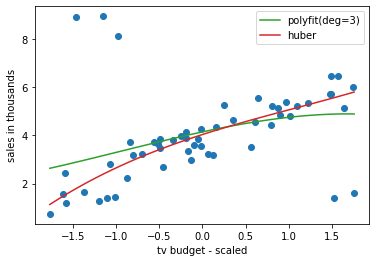

In [12]:
# Fit a polynomial of degree 3
X_poly = np.c_[x, x ** 2, x ** 3]  # Feature engineering
lr_huber.fit(X_poly, y)

# Same with polyfit
coefs = np.polyfit(x, y, deg=3)

# Compute prediction line
x_values = np.linspace(min(x), max(x), num=100)
y_values_polyfit = np.polyval(coefs, x_values)
y_values_huber = lr_huber.predict(np.c_[x_values, x_values ** 2, x_values ** 3])

# Plot it
plt.scatter(x, y)
plt.plot(x_values, y_values_polyfit, c="C2", label="polyfit(deg=3)")
plt.plot(x_values, y_values_huber, c="C3", label="huber")
plt.xlabel("tv budget - scaled")
plt.ylabel("sales in thousands")
plt.legend()
plt.show()